# Import important files

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# Showing matplotlib plots in jupyter notebook
%matplotlib inline

# Notes Before last version

In [83]:
# Using patientId for better intitution
# Drawing polar heatmap
# Learning curve with smaller numbers
# How we can use SVR for Regression
# Making module for finding best functino of sklearn

# Read Data

In [17]:
# Getting Training dataset
# Import dataset as Dataframe
df_full = pd.read_csv("../Dataset/slice_localization_data.csv", sep=',')

# Import dataset as numpy array
X_full = np.genfromtxt("../Dataset/slice_localization_data.csv", delimiter=',', skip_header=1)

# Making distnict output column for later uses
y = X_full[:,385]

# Removing first and last column from the dataset
X = X_full[:,1:385]

# Converting X to Dataframe
df = pd.DataFrame(X)
df.columns = df_full.columns[1:385]

# Getting size of the Training Dataset
m,n = X.shape

In [5]:
# Getting shape of the Dataset
X_full.shape

(53500, 386)

In [6]:
# Getting first 10 rows of the numpy array
X_full[0:10]

array([[  0.      ,   0.      ,   0.      , ...,  -0.25    ,  -0.25    ,
         21.803851],
       [  0.      ,   0.      ,   0.      , ...,  -0.25    ,  -0.25    ,
         21.745726],
       [  0.      ,   0.      ,   0.      , ...,  -0.25    ,  -0.25    ,
         21.6876  ],
       ..., 
       [  0.      ,   0.      ,   0.      , ...,  -0.25    ,  -0.25    ,
         21.396971],
       [  0.      ,   0.      ,   0.      , ...,  -0.25    ,  -0.25    ,
         21.28072 ],
       [  0.      ,   0.      ,   0.      , ...,  -0.25    ,  -0.25    ,
         22.617612]])

In [7]:
# Getting first 10 rows of the dataframe
df_full.head(10)

,patientId,value0,value1,value2,value3,value4,value5,value6,value7,value8,...,value375,value376,value377,value378,value379,value380,value381,value382,value383,reference
0,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.980381,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.803851
1,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.745726
2,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.687600
3,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.629474
4,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.976833,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.571348
5,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.953202,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.513223
6,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.000000,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.455097
7,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.867572,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.396971
8,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.930170,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.280720
9,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.990034,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,22.617612


In [8]:
# Getting some intuition of data
df_full.describe()

,patientId,value0,value1,value2,value3,value4,value5,value6,value7,value8,...,value375,value376,value377,value378,value379,value380,value381,value382,value383,reference
count,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,...,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000
mean,47.075701,0.059627,0.071558,0.145819,0.218728,0.274762,0.276189,0.204531,0.062281,-0.042025,...,-0.029404,0.182913,0.320112,0.359373,0.342889,0.266091,0.083049,-0.031146,-0.154524,47.028039
std,27.414240,0.174243,0.196921,0.300270,0.359163,0.378862,0.369605,0.351294,0.292232,0.268391,...,0.085817,0.383333,0.463517,0.478188,0.471811,0.437633,0.279734,0.098738,0.122491,22.347042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,-0.250000,...,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,1.738733
25%,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,29.891607
50%,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,43.987893
75%,70.000000,0.000000,0.000000,0.000000,0.446429,0.684477,0.662382,0.441412,0.000000,0.000000,...,0.000000,0.000000,0.996286,0.999677,0.999560,0.949478,0.000000,0.000000,0.000000,63.735059
max,96.000000,1.000000,1.000000,1.000000,1.000000,0.998790,0.996468,0.999334,1.000000,1.000000,...,0.961279,1.000000,1.000000,1.000000,1.000000,1.000000,0.999857,0.996839,0.942851,97.489115


In [9]:
# Gettign unqiue values of the "Patient ID"
np.unique(df_full["patientId"])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96], dtype=int64)

# Functions Section

In [10]:
# Import mean_squared_error function from Sklearn Library
from sklearn.metrics import mean_squared_error

def plotLearningCurves(X,y,step):
    
    m,n = X.shape
    maxVal = (int)(m / 10) * 10
    N_size_arr = np.arange(10, maxVal + 10, step)
    error_arr = np.zeros(( len(np.arange(10, maxVal + 10, step)) ,2 ))
    index = 0
    
    # Increasing train dataset size, "step" times in each iteration
    for i in N_size_arr:
        
        # Splitting Training dataset with size i into train and cross validation sets
        X_train, X_test, y_train, y_test = train_test_split(X[:i,:], y[:i], test_size=0.33, random_state=42)
        
        # Fitting Model
        lm.fit(X_train, y_train)
        
        # Computing both mean squared error of training dataset and cross validation datasets predections
        error_arr[index,0] = mean_squared_error(y_train , lm.predict(X_train))
        error_arr[index,1] = mean_squared_error(y_test, lm.predict(X_test))
        
        # Increasing index with 1
        index += 1
    
    # Initializing the figure
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_axes([0,0,1,1])
    ax.set_yscale('log')
    
    # Plotting "Training set size" vs. "Mean Squared Error" for both of the train and cross validation dataset's errors
    line1, = ax.plot(N_size_arr,error_arr[:,0], c='red')
    line2, = ax.plot(N_size_arr,error_arr[:,1], c='blue')
    
    # Adding labels && legends to our plot
    ax.set_xlabel("N (Training set size)")
    ax.set_ylabel("Mean Squared Error")
    
    ax.legend((line1,line2),("Train Error","Test Error"))

# Data analysis

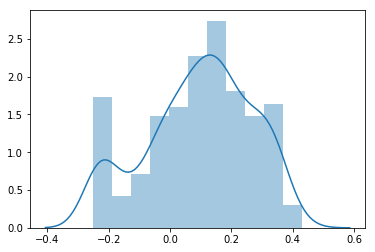

In [11]:
# Plot "Means of each column in dataset( Attributes ) except first and last column"  distplot
sns.distplot(df.mean())

# ===> We can conclude all of our attributes are in [-1,1] range, so we don't need to use feature normalize technique

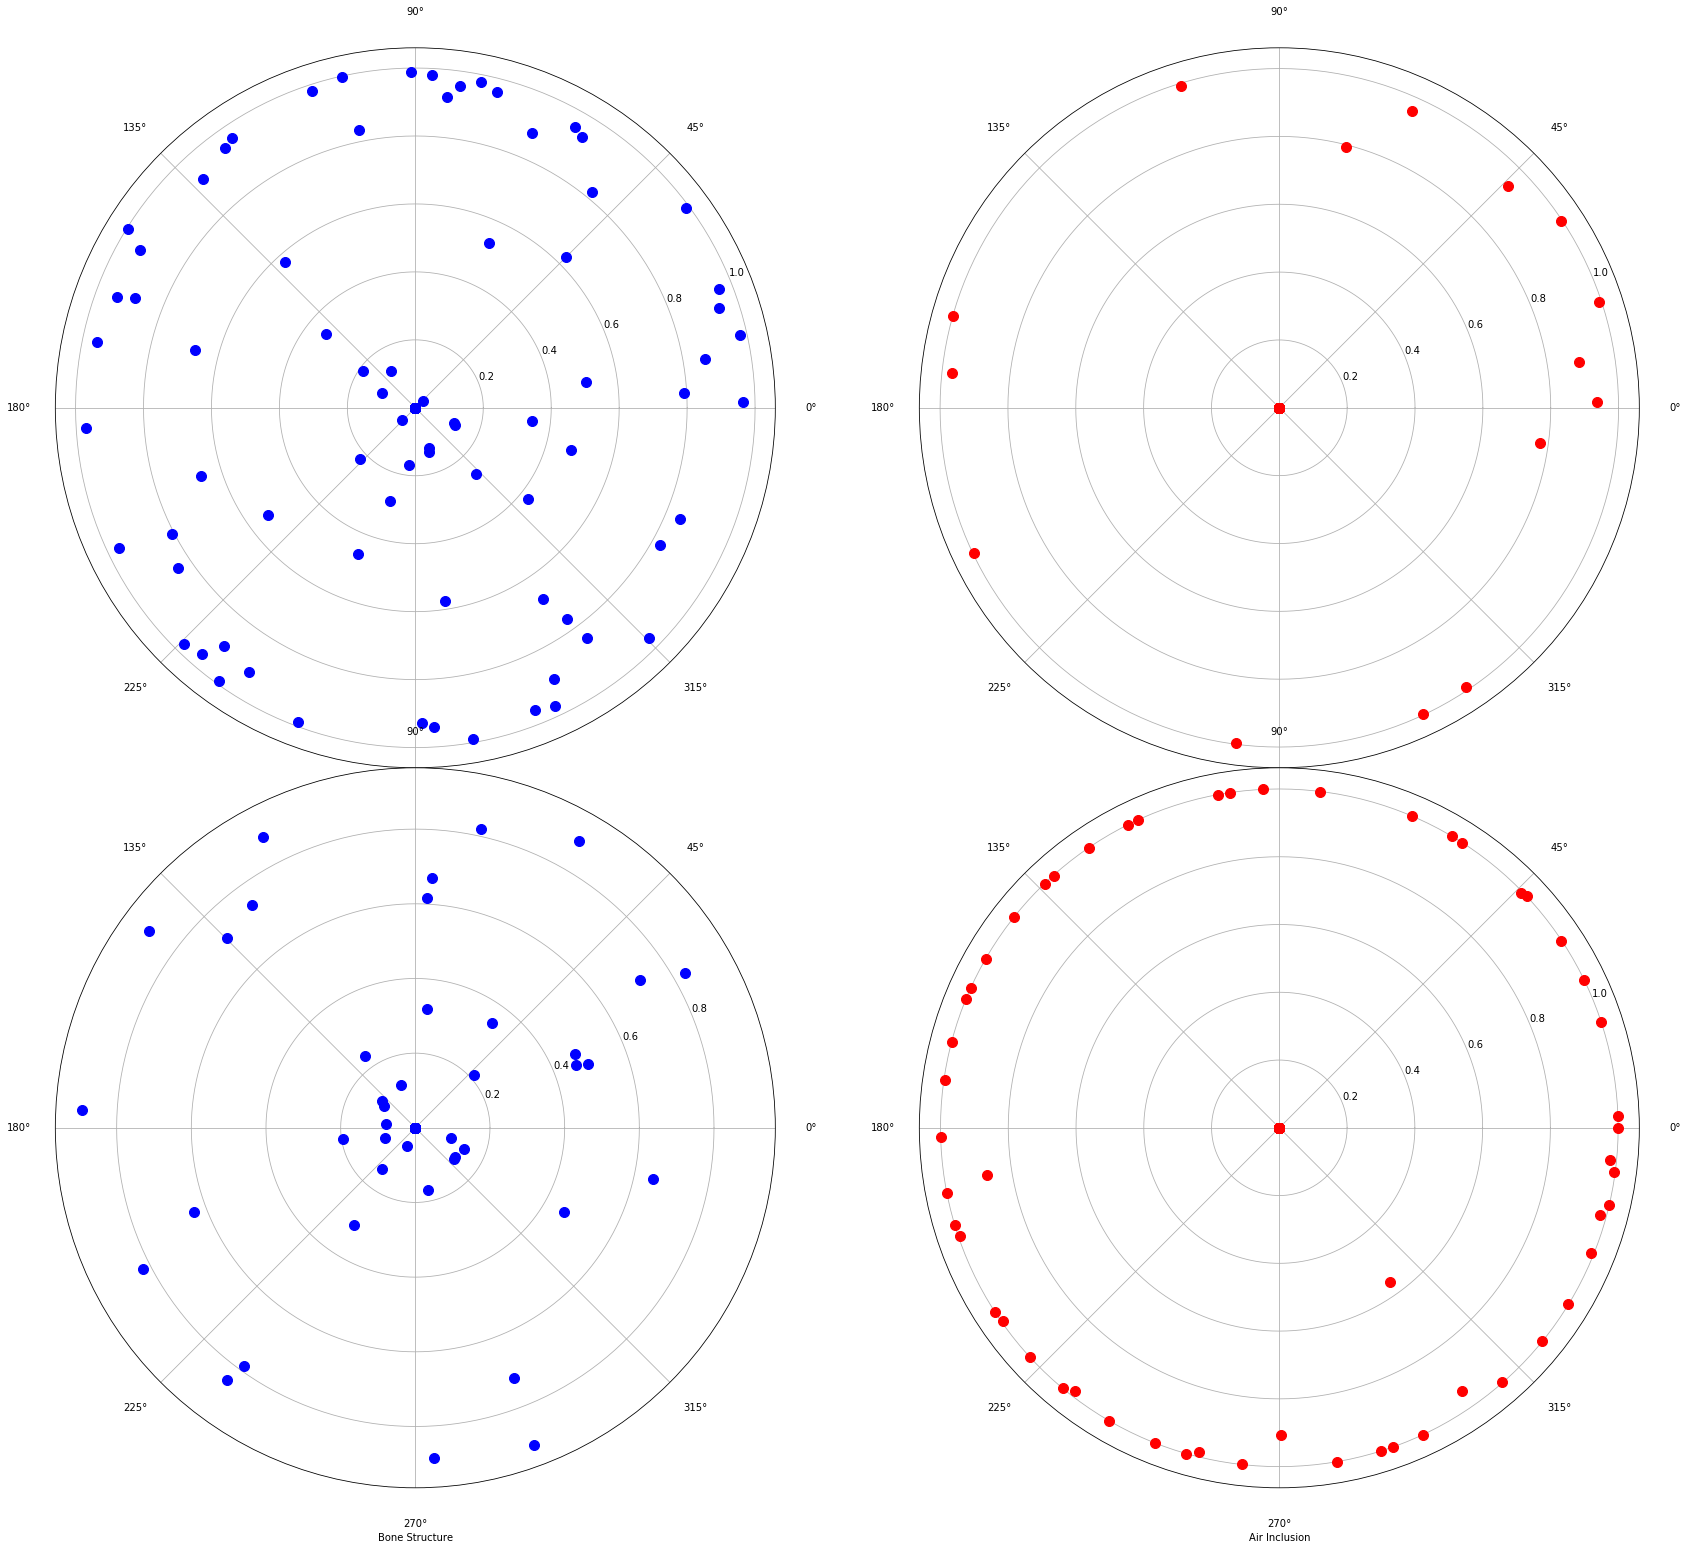

In [12]:
fig = plt.figure(figsize=(12,10))

axes1 = fig.add_axes([0, 2, 1, 1], projection='polar')
axes2 = fig.add_axes([1, 2,1,1], projection='polar')
axes3 = fig.add_axes([0, 1, 1, 1], projection='polar')
axes4 = fig.add_axes([1, 1,1,1], projection='polar')

# Plotting first example of bone structure of the one person
axes1.plot(X[150,1:241], 'bo', ms=10)
axes1.set_xlabel("Bone Structure")

# Plotting first example of air inclusion of the one person
axes2.plot(X[150,241:386], 'ro', ms=10)
axes2.set_xlabel("Air Inclusion")

# Plotting second example of bone structure of the one person
axes3.plot(X[3541,1:241], 'bo', ms=10)
axes3.set_xlabel("Bone Structure")

# Plotting second example of air inclusion of the one person
axes4.plot(X[3541,241:386], 'ro', ms=10)
axes4.set_xlabel("Air Inclusion")

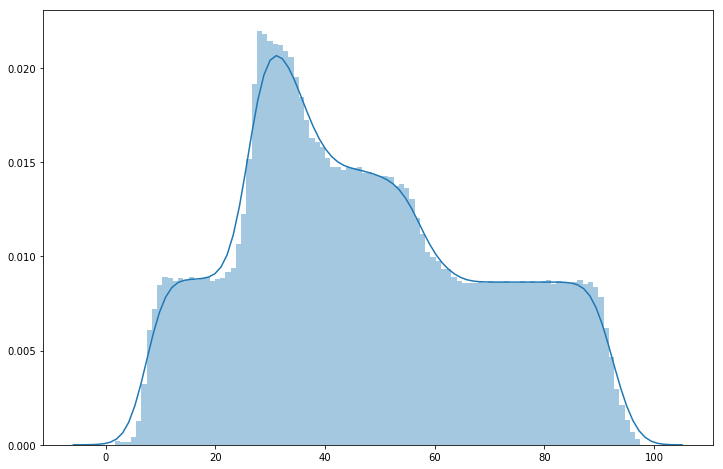

In [13]:
# Plot "Reference" column distplot
plt.figure(figsize=(12,8))
sns.distplot(y, bins=100)

# ==> We can see that we don't have any image for locations of body with value bigger than 100, and majority of the
# images are taken with values in [25,40] range

# Predection Section

In [14]:
X.shape

(53500, 384)

In [15]:
y.shape

(53500,)

In [16]:
# Using SkLearn Library "Linear Regression" Method
from sklearn.linear_model import LinearRegression

# Initialization Model
lm = LinearRegression()

In [17]:
# Splitting Data into Training and Cross Validation Datasets
# Using Sklearn library for splitting data
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

C:\Users\Danietzio\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
# Fitting Model with Train dataset ( Columns except "PatientId", "Reference")
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# Model Thetas
lm.coef_

array([ -2.49139644e+00,  -8.69497759e-01,   9.24385440e-01,
         6.62012145e+00,   6.42405712e+00,   3.29487223e+00,
         8.78259130e-01,   3.23571134e+00,  -5.55753081e+00,
        -9.17715543e-01,  -1.69933517e+00,   7.63349941e-02,
         3.51426894e-01,   4.42502516e-01,  -2.99870138e-01,
         3.65831336e-01,   1.07190094e+00,   6.17675949e-01,
        -3.23179052e+00,   3.59100341e+00,   1.69590241e+00,
        -4.87804896e-01,  -2.08363544e+00,   1.31187654e+00,
        -7.91772202e-01,  -5.14274490e-01,  -7.51391761e-01,
        -9.40538410e+00,   1.10672289e+01,   3.89230047e+00,
         5.89338084e-01,   8.42582554e-01,  -8.38247461e-01,
         3.45091308e-01,   5.93980190e-01,  -3.47319519e+00,
        -4.27445811e+00,  -5.78937940e-01,  -5.57114137e+00,
         1.25405079e+00,  -3.80578414e+00,  -1.00349029e+00,
        -3.04525502e+00,   5.39976900e-02,  -2.39727413e+00,
        -1.92287396e+00,  -2.35967959e-01,   2.05902910e+00,
         2.40929366e+13,

In [20]:
# Predecting Reference values with Cross validation dataset
pred = lm.predict(X_test)

# Evaluating error with squared error method without using SkLearn Library
eval_err = np.sum( ( pred - y_test ) ** 2 , axis=0 ) / len(pred)
eval_err

68.254364896165498

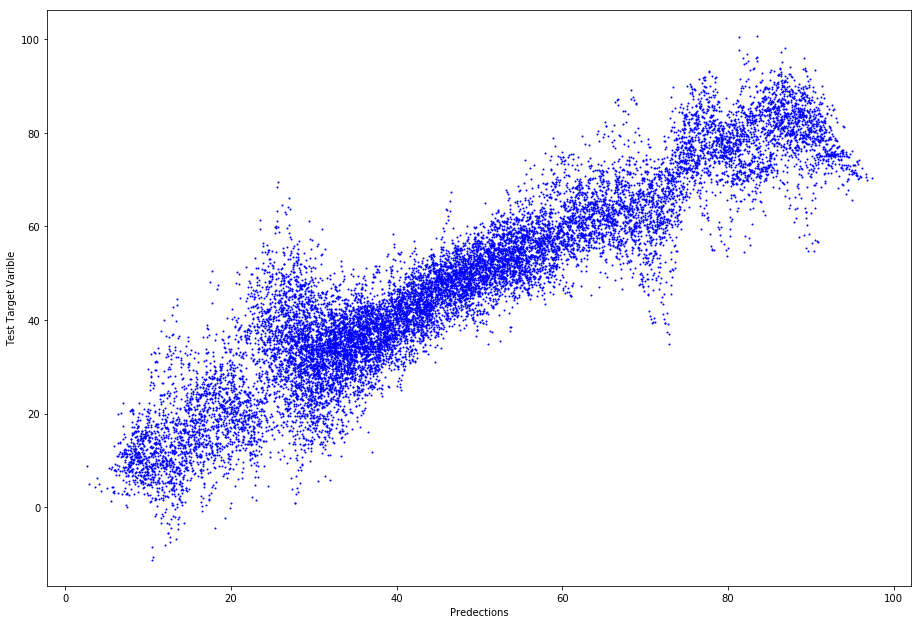

In [29]:
# Plot predections vs. y_test for better understanding how our model works!
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])

ax.set_xlabel("Predections")
ax.set_ylabel("Test Target Varible")
ax.plot(y_test, pred,'bo',ms=1)

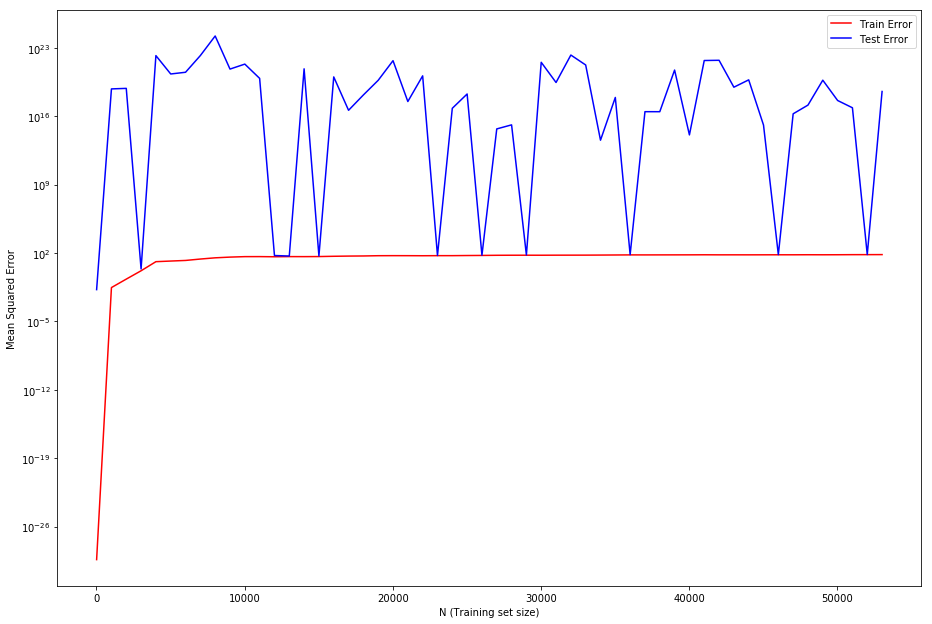

In [22]:
plotLearningCurves(X,y,1000)

## Trying for getting better predections

In [23]:
# Checking error on Train set value and Comparing it with Test dataset error
pred_train = lm.predict(X_train)
mean_squared_error(pred_train,y_train)

# ===> We can see both of the MSE on Training Dataset && Cross validation Dataset is high, so maybe algorithm suffers from High bias

1.5484293731660227e+18

In [24]:
# Normalize features but maybe it doesn't help, but it can help for decreasing time of the fitting algorithm
lm.normalize = True
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [25]:
pred_train = lm.predict(X_train)
mean_squared_error(pred_train, y_train)

# ===> We can see normalizing doesn't help

67.796342478357161

In [31]:
# Using other regression model of sklearn
from sklearn.linear_model import SGDRegressor

sg = SGDRegressor(alpha=0,max_iter=10000,n_iter=10000,learning_rate='constant',eta0=0.0001)

C:\Users\Danietzio\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [33]:
# Fitting Model
sg.fit(X_train,y_train)

SGDRegressor(alpha=0, average=False, epsilon=0.1, eta0=0.0001,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=10000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [35]:
# Predecting Using new model ( SGDRegressor )
pred = sg.predict(X_test)

In [39]:
# Evaluating model
mean_squared_error(y_test,pred)

68.228261098448442

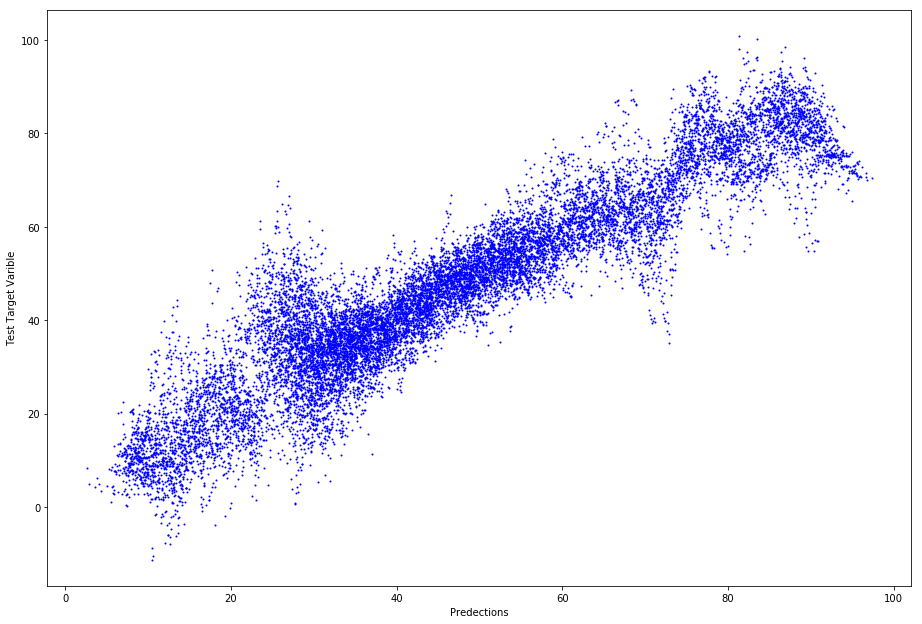

In [40]:
# Plot predections vs. y_test for better understanding how our model works!
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])

ax.set_xlabel("Predections")
ax.set_ylabel("Test Target Varible")
ax.plot(y_test, pred,'bo',ms=1)

In [59]:
# Because train Error && test Error are very close to each other and they are almost high so we can conclude we are suffering
# from high bias, and we should add extra features

# In the last try, We saw that more iterations doesn't help so much
# So we try more features

# Function for finding best degree and alplha
# Before running this function we should import following functions
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm

def findBestRegressorModel(X,y,sample_d =None,sample_alpha =None):
    
    # Defining default values of "Degree of the model" && "lambda of regularization part in loss function ( alpha )"
    if( sample_d == None ):
        sample_d = np.array([1,2,3,4,5,6,7,8,9])
    if( sample_alpha == None ):
        sample_alpha = np.array([0.0001,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10])
    
    
    
    # Container of the model error in each degree ( We'll use last two column for holding lambda and degree values 
    # in specific iteration )
    error_tracker = np.zeros(( len(sample_d), 4))
        
    # Spliting data into Train, Cross Validation, Test dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Creating artificial new features with degrees defined in sample_d array
    # Container of our artificial created new features
    A_train = extraFeatureCreature(X_train.copy(), sample_d)
    
    for deg in sample_d:
        
        # Spliting data into Train, Cross Validation dataset
        X_train, X_cross, y_train, y_cross = train_test_split(A_train[deg - 1], y, test_size=0.2)
        
        if( len(X) < 100000 ):
            
            # It's better to use SGDRegressor
            for lam in sample_alpha:
                sg = SGDRegressor(alpha=lam, max_iter=1000, n_iter=1000)
                sg.fit(X_train,y_train)
                
                pred_train = sg.predict(X_train)
                pred_cross = sg.predict(X_cross)
                
                MSE_train = mean.squared_error(pred_train, y_train)
                MSE_cross = mean_squared_error(pred_cross, y_cross)
                
                error_tracker[deg - 1][0] = MSE_train
                error_tracker[deg - 1][1] = MSE_test
                error_tracker[deg - 1][2] = lam
                error_tracker[deg - 1][3] = deg
                
        else:
            a = a
            # It's better to use SVR or EnsembleRegressor
    
    # Creating extra features for test dataset
    A_test = extraFeatureCreature(X_test.copy(), sample_d)
    
    # Plotting Degree vs Train && Test error, Making indexing with degree better
    # line1, = ax.plot(error_tracker[:,3],error_tracker[:,0], c='red')
    # line2, = ax.plot(error_tracker[:,3],error_tracker[:,1], c='blue')
    #ax.set_xlabel("D (Degree of the model)")
    #ax.set_ylabel("Train && Test Error")
    #ax.legend((line1,line2),("Train Error","Test Error"))
    
    # Plot "Degree of model" vs. "Train and Test Error" for finding best possible model visually
    twoPlotsInOne(X1= error_tracker[:,3], \
                  y1= error_tracker[:,0], y2= error_tracker[:,1], \
                  X_label= "D (Degree of the model)", y_label= "Train && Test Error", \
                  first_legend= 
                  
    # Finding best lambda and Degree
    best_lam = error_tracker[np.argmin(error_tracker[:,1])][2]
    best_deg = error_tracker[np.argmin(error_tracker[:,1])][3]
    
    sg = SGDRegressor(alpha=best_lam, max_iter=1000, n_iter=1000)
    sg.fit(A_train[best_deg - 1],y_train)
    pred = sg.predict(A_test[best_deg - 1])
    
    # Checking how much good do our model generalize !!
    cross_error = mean_squared_error(y_test,pred)
    
def extraFeatureCreature(X, sample_d = [1,2,3,4,5,6,7,8,9,10]):
    
    # Container of our artificial created new features
    A = []
    
    # Creating artificial new features with degrees defined in sample_d array
    for deg in sample_d:
        
        # No creating new feautre when degree is as same as our real Data
        if(deg != 1):
            X = np.concatenate((X, np.power(X, deg)))
        
        # Appending new model with new degree
        A.append(X)
    
def twoPlotsInOne(X1,y1,y2,X2= None, \
                  c1= 'red',c2= 'blue', \
                  X_label= None, y_label= None, \
                  first_legend= None, second_legend= None):
    
    # Defining size of the plot
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_axes([0,0,1,1])
    
    # Plotting data's 
    line1, = ax.plot( X1 ,y1,c=c1)
    line2, = ax.plot( X1 if X2 == None else X2 ,y2,c=c2)
    
    # Adding 'x' axis label
    ax.set_xlabel(X_label)
    
    # Adding 'y' axis label
    ax.set_ylabel(y_label)
    
    # Adding Legends to our plot
    ax.legend((line1,line2),(first_legend,second_legend))

In [43]:
a = np.arange(1,11,1)
b = np.random.randn(10)
c = np.random.randn(10)